# Build the linear regression model using scikit learn in boston data to predict
## 'Price' based on other dependent variable.


In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [40]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
bos.shape

(506, 13)

In [42]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [43]:
bos.isna().sum() # finding the count of missing values from different columns

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [51]:

X = bos.loc[:,0:11]

In [52]:
X.shape

(506, 12)

In [53]:
y = bos[12]


In [57]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

In [59]:

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False)
lm.fit(X_train, y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.0
[ 0.8511245   0.12711037  0.10591109 -0.45025281  2.14792486 -2.63294619
  2.18772591  0.787894    0.46694258 -0.51007969 -0.2361762  -0.73781534]


In [60]:
y_pred = lm.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


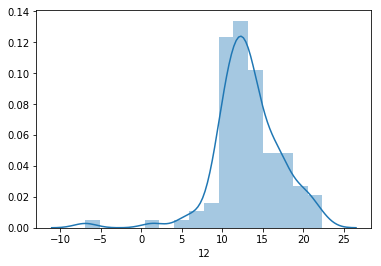

In [62]:
sns.distplot(y_test-y_pred)

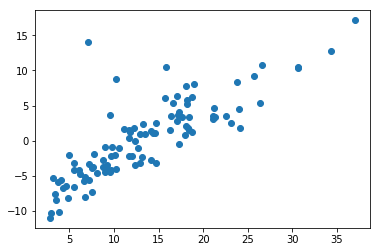

In [65]:
plt.scatter(y_test,y_pred)

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 13.300871981764809
MSE: 189.90784371053
RMSE: 13.780705486677014
